In [1]:
import fastai; fastai.__version__

'1.0.19'

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
class ImageRegressionDataset(ImageClassificationBase):
    def __init__(self, fns:FilePathList, y:Collection[Number], y_range:OptRange=None):
        super().__init__(fns, classes=[])
        self.y = np.array(y, dtype=np.float32)[:, None]
        self.y_range = y_range
        self.c = 1
        self.loss_func = F.mse_loss

In [4]:
pdata = Path('/data/cifar10/train/airplane/')

list(pdata.glob('*.png'))[:3]

[PosixPath('/data/cifar10/train/airplane/17015_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/44932_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/43160_airplane.png')]

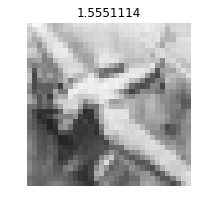

In [5]:
n = 100
n_val = 20
fns = list(pdata.glob('*.png'))[:n]
y = np.random.randn(n)

ds_trn = ImageRegressionDataset(fns[:-n_val], y[:-n_val])
ds_val = ImageRegressionDataset(fns[-n_val:], y[-n_val:])

img, y = ds_val[0]
img.show(title=y[0])

In [6]:
data = ImageDataBunch.create(ds_trn, ds_val)

learn = create_cnn(data, models.resnet18)

learn.fit(1)

Total time: 00:00
epoch  train_loss  valid_loss
1      1.250102    1.324627    (00:00)



In [7]:
data = ImageDataBunch.create(ds_trn, ds_val)

learn = create_cnn(data, models.resnet18, loss_func=F.l1_loss)

learn.fit(1)

Total time: 00:00
epoch  train_loss  valid_loss
1      1.430220    1.078725    (00:00)

